# Exploratory Data Analysis (EDA) for the Spider Dataset

This notebook explores the `train_spider.json` part of the Spider dataset. The goal is to understand the characteristics of the data, which includes:

1.  **Dataset Overview**: Basic statistics and data format.
2.  **Database Distribution**: How many unique databases are there, and how are the questions distributed among them?
3.  **SQL Query Analysis**: What is the complexity of the SQL queries (length, keywords used)?
4.  **Natural Language Analysis**: How long and complex are the user questions?

These insights are crucial for building and evaluating our Text-to-SQL model.

In [3]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

# Set plot styles for better aesthetics
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Data Loading and Overview

In [4]:
# Load the training data from the relative data directory
try:
    df = pd.read_json('./data/train_spider.json')
    print(f"Successfully loaded the dataset. Number of samples: {len(df)}")
except FileNotFoundError:
    print("Error: 'train_spider.json' not found. Make sure it's in the 'data/' directory.")

df.head()

Successfully loaded the dataset. Number of samples: 7000


,db_id,query,query_toks,query_toks_no_value,question,question_toks,sql
0,department_management,SELECT count(*) FROM head WHERE age > 56,"[SELECT, count, (, *, ), FROM, head, WHERE, ag...","[select, count, (, *, ), from, head, where, ag...",How many heads of the departments are older th...,"[How, many, heads, of, the, departments, are, ...","{'from': {'table_units': [['table_unit', 1]], ..."
1,department_management,"SELECT name , born_state , age FROM head ORD...","[SELECT, name, ,, born_state, ,, age, FROM, he...","[select, name, ,, born_state, ,, age, from, he...","List the name, born state and age of the heads...","[List, the, name, ,, born, state, and, age, of...","{'from': {'table_units': [['table_unit', 1]], ..."
2,department_management,"SELECT creation , name , budget_in_billions ...","[SELECT, creation, ,, name, ,, budget_in_billi...","[select, creation, ,, name, ,, budget_in_billi...","List the creation year, name and budget of eac...","[List, the, creation, year, ,, name, and, budg...","{'from': {'table_units': [['table_unit', 0]], ..."
3,department_management,"SELECT max(budget_in_billions) , min(budget_i...","[SELECT, max, (, budget_in_billions, ), ,, min...","[select, max, (, budget_in_billions, ), ,, min...",What are the maximum and minimum budget of the...,"[What, are, the, maximum, and, minimum, budget...","{'from': {'table_units': [['table_unit', 0]], ..."
4,department_management,SELECT avg(num_employees) FROM department WHER...,"[SELECT, avg, (, num_employees, ), FROM, depar...","[select, avg, (, num_employees, ), from, depar...",What is the average number of employees of the...,"[What, is, the, average, number, of, employees...","{'from': {'table_units': [['table_unit', 0]], ..."


## 2. Database Distribution Analysis

🧠 Number of unique databases: 140

📊 Top 10 most common databases:
db_id
college_2     170
college_1     164
hr_1          124
store_1       112
soccer_2      106
bike_1        104
hospital_1    100
music_2       100
music_1       100
dorm_1        100
Name: count, dtype: int64


/var/folders/sf/rmxl8zr555s3c2rs9g9tmk100000gn/T/ipykernel_61668/782391430.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_dbs.values, y=top_10_dbs.index, palette='viridis')


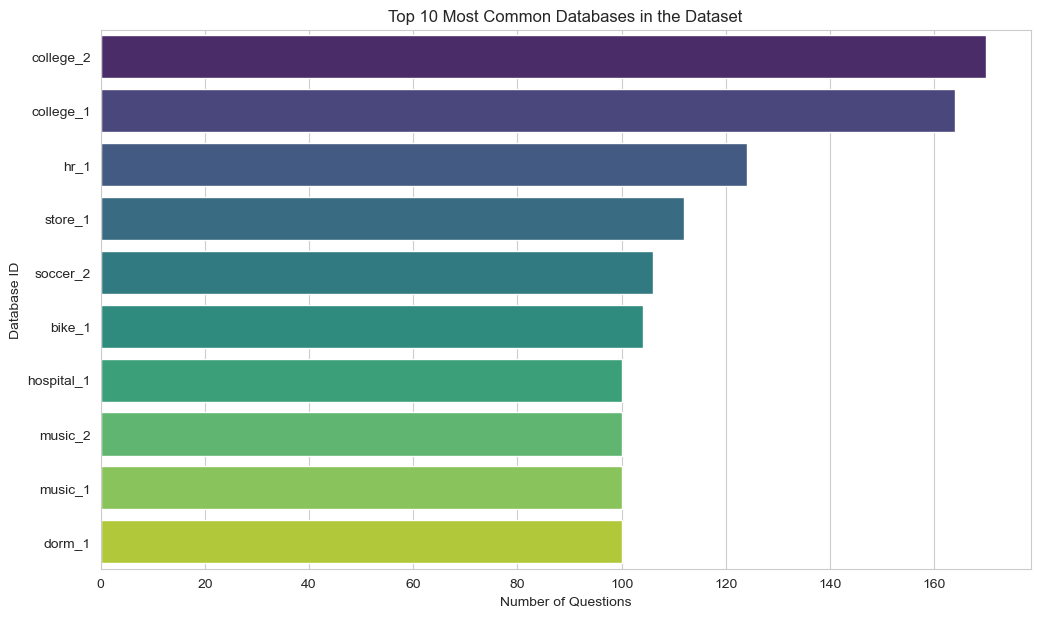

In [5]:
print(f"🧠 Number of unique databases: {df['db_id'].nunique()}")

# Get the top 10 most common databases
top_10_dbs = df['db_id'].value_counts().head(10)

print("\n📊 Top 10 most common databases:")
print(top_10_dbs)

# Plot the distribution of the top 10 databases
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_dbs.values, y=top_10_dbs.index, palette='viridis')
plt.title('Top 10 Most Common Databases in the Dataset')
plt.xlabel('Number of Questions')
plt.ylabel('Database ID')
plt.show()

**Insight**: The dataset contains questions across 140 unique databases. However, the distribution is not uniform, with databases like `college_2` and `college_1` appearing much more frequently. This might introduce a bias in the model if not handled carefully.

## 3. SQL Query Analysis

### 3.1. SQL Query Length (in characters)

🧮 SQL Query Length Statistics (characters):
count    7000.000000
mean      109.642429
std        64.809316
min        18.000000
25%        62.000000
50%        93.000000
75%       146.250000
max       577.000000
Name: sql_char_length, dtype: float64


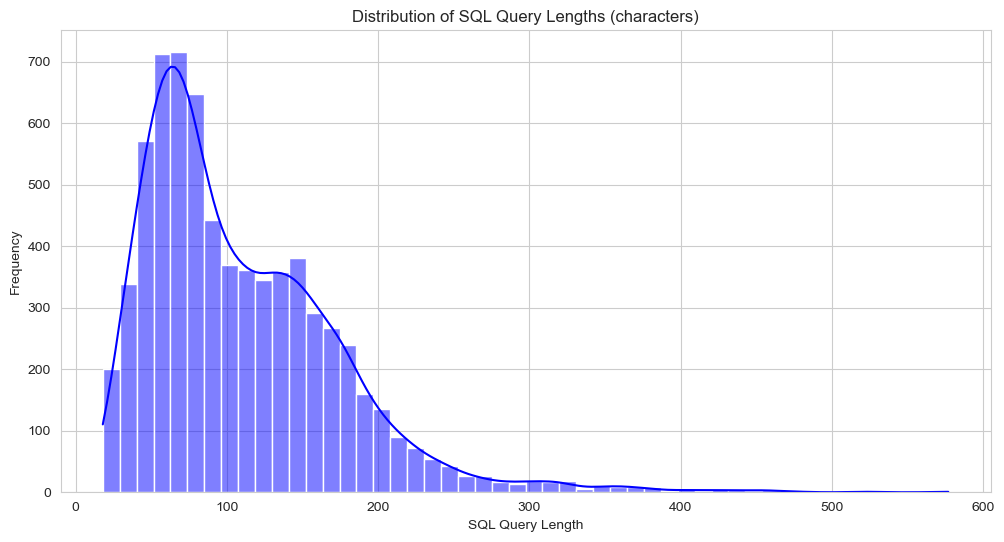

In [6]:
df['sql_char_length'] = df['query'].str.len()

print("🧮 SQL Query Length Statistics (characters):")
print(df['sql_char_length'].describe())

# Plot the distribution of SQL query lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['sql_char_length'], bins=50, kde=True, color='blue')
plt.title('Distribution of SQL Query Lengths (characters)')
plt.xlabel('SQL Query Length')
plt.ylabel('Frequency')
plt.show()

**Insight**: Most SQL queries are between 50 and 150 characters long. The distribution is right-skewed, indicating the presence of a few very long and complex queries. This range is manageable for transformer models like BART.

### 3.2. SQL Keyword Frequency


🔍 Frequency of SQL keywords in queries:
     Keyword  Frequency
0     SELECT       7000
1      WHERE       3502
3       JOIN       2783
4   GROUP BY       1775
2   ORDER BY       1628
6      LIMIT       1107
5     HAVING        427
7  INTERSECT        250
9     EXCEPT        209
8      UNION         67


/var/folders/sf/rmxl8zr555s3c2rs9g9tmk100000gn/T/ipykernel_61668/2597126334.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=keyword_df, x='Frequency', y='Keyword', palette='magma')


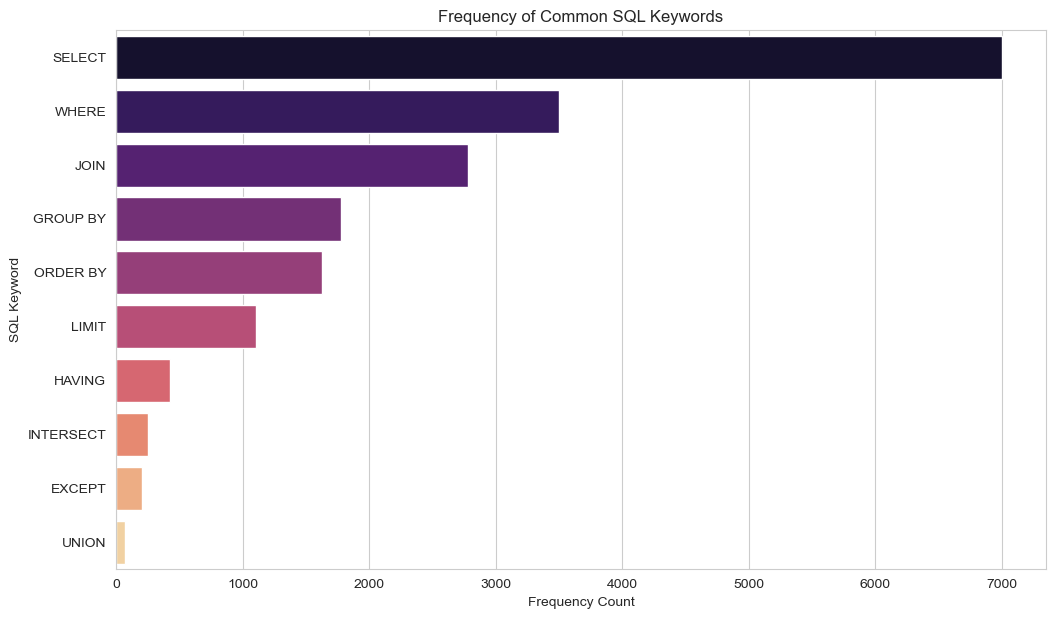

In [7]:
keywords = ['SELECT', 'WHERE', 'GROUP BY', 'ORDER BY', 'JOIN', 'HAVING', 'LIMIT', 'INTERSECT', 'EXCEPT', 'UNION']

# Count how many times each keyword appears
keyword_counts = Counter()
for query in df['query']:
    query_upper = query.upper()
    for kw in keywords:
        if kw in query_upper:
            keyword_counts[kw] += 1

# Create a DataFrame for plotting
keyword_df = pd.DataFrame(keyword_counts.items(), columns=['Keyword', 'Frequency']).sort_values('Frequency', ascending=False)

print("\n🔍 Frequency of SQL keywords in queries:")
print(keyword_df)

# Plot the keyword frequency
plt.figure(figsize=(12, 7))
sns.barplot(data=keyword_df, x='Frequency', y='Keyword', palette='magma')
plt.title('Frequency of Common SQL Keywords')
plt.xlabel('Frequency Count')
plt.ylabel('SQL Keyword')
plt.show()

**Insight**: As expected, `SELECT` is present in every query. `WHERE` and `JOIN` are very common, indicating that many questions require filtering and table relationships. `GROUP BY` and `ORDER BY` are also frequent. More complex clauses like `HAVING`, `INTERSECT`, and `EXCEPT` are much rarer, suggesting the model will have fewer examples to learn from for these cases.

## 4. Natural Language Question Analysis

🧾 Natural Language Question Length Statistics (words):
count    7000.000000
mean       12.724857
std         4.335647
min         3.000000
25%        10.000000
50%        12.000000
75%        15.000000
max        39.000000
Name: nl_word_length, dtype: float64


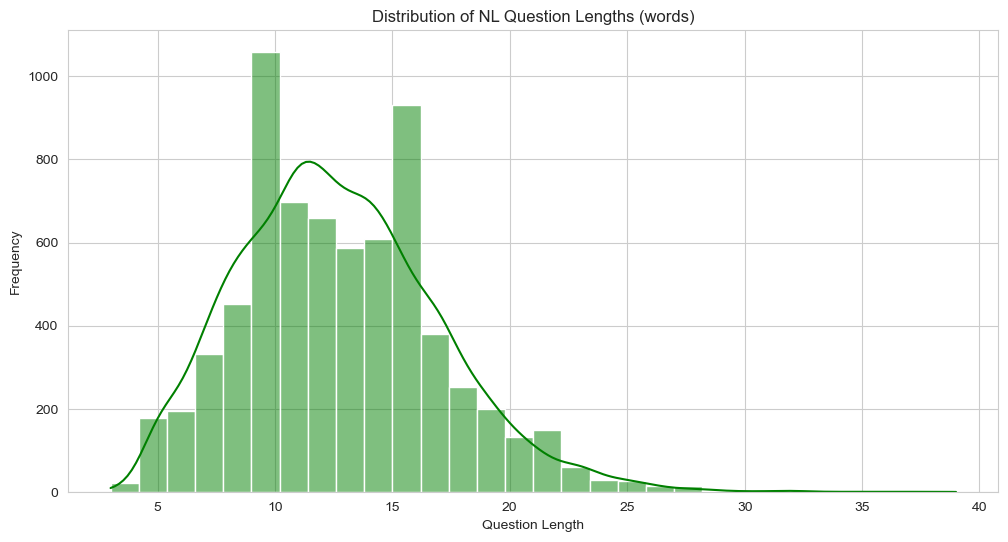

In [8]:
df['nl_word_length'] = df['question'].apply(lambda x: len(x.split()))

print("🧾 Natural Language Question Length Statistics (words):")
print(df['nl_word_length'].describe())

# Plot the distribution of NL question lengths
plt.figure(figsize=(12, 6))
sns.histplot(df['nl_word_length'], bins=30, kde=True, color='green')
plt.title('Distribution of NL Question Lengths (words)')
plt.xlabel('Question Length')
plt.ylabel('Frequency')
plt.show()

**Insight**: The natural language questions are relatively short, with an average length of about 13 words. The distribution is fairly tight, with most questions falling between 5 and 20 words. This suggests that the input to our model will be concise and focused.

## EDA Summary

- The dataset is diverse, with 140 databases, but the question distribution is skewed towards a few popular ones.
- SQL queries vary in length, with most being moderately complex. The model must handle common clauses like `JOIN`, `WHERE`, `GROUP BY`, and `ORDER BY` effectively.
- Natural language inputs are short and direct, which simplifies the task of understanding user intent.